# Рубежный контроль №1

## Калашников Артем ИУ5 63Б 11 Вариант

## Импорт библиотек

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [58]:
DB = pd.read_csv('marvel-wikia-data.csv', sep=',')

In [59]:
# Первые пять строк датасета
DB.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [60]:
# Размер датасета
DB.shape

(16376, 13)

In [61]:
# Количество нулевых элементов
DB.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [62]:
# Колонки и их типы данных
DB.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [63]:
# Колонки с пропусками и доля пропусков
cols_with_na = [c for c in DB.columns if DB[c].isnull().sum() > 0]
[(c, DB[c].isnull().mean()) for c in cols_with_na]

[('ID', 0.23021494870542256),
 ('ALIGN', 0.17171470444553005),
 ('EYE', 0.5964215925744992),
 ('HAIR', 0.26038104543234003),
 ('SEX', 0.052149487054225695),
 ('GSM', 0.9945041524181729),
 ('ALIVE', 0.00018319491939423546),
 ('APPEARANCES', 0.06692721055202736),
 ('FIRST APPEARANCE', 0.04976795310210064),
 ('Year', 0.04976795310210064)]

## Обработка пропусков для категориального признака

Можно заметить, что столбец "GSM" пропущено слишком много данных(99%). Проанализировав данный столбец, можно понять что пустые элементы означают гетеросексуальность персонажа, следовательно все пустые элементы можно заменить на "Heterosexual".

In [64]:
DBNew_3 = DB[['GSM']].fillna('Heterosexual')
DB[['GSM']]=DBNew_3
DB.head(16375)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Heterosexual,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Heterosexual,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16370,674414,Phoenix's Shadow (Earth-616),\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,Heterosexual,Living Characters,NaN,NaN,NaN
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Heterosexual,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Heterosexual,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Heterosexual,Living Characters,NaN,NaN,NaN


## Обработка пропусков для количественного признака

In [65]:
total_count = DB.shape[0]
Ncols = []
for col in DB.columns:
    temp_null_count = DB[DB[col].isnull()].shape[0]
    dt = str(DB[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        Ncols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
print(Ncols)

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.
['APPEARANCES', 'Year']


### Appearances

В столбце 'APPEARANCES' содержиться информация количестве появлений персонажа. Будем считать, что отсутствие информации говорит о том, что персонаж не появлялся. Поэтому заполним пропуски нулями.

In [66]:
DBNew = DB[['APPEARANCES']].fillna(0)

In [67]:
DB[['APPEARANCES']]=DBNew

### Year

В столбце 'YEAR' содержиться информация о годе создания персонажа. Будем считать, что отсутствие информации говорит о том, что информация о создание персонажа отсутствует. Поэтому заполним пропуски в этих колонках '-1'.

In [68]:
DBNew_1 = DB[['Year']].fillna(-1)
DB[['Year']]=DBNew_1

### Получившиеся значения

In [69]:
DB.head(16375)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Heterosexual,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Heterosexual,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16370,674414,Phoenix's Shadow (Earth-616),\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,Heterosexual,Living Characters,0.0,NaN,-1.0
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Heterosexual,Living Characters,0.0,NaN,-1.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Heterosexual,Living Characters,0.0,NaN,-1.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Heterosexual,Living Characters,0.0,NaN,-1.0


## Ящик с усами (boxplot)

<AxesSubplot:xlabel='Year'>

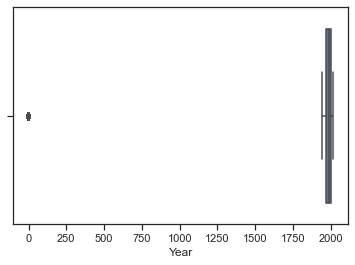

In [70]:
sns.boxplot(x=DB['Year'])

<AxesSubplot:xlabel='APPEARANCES'>

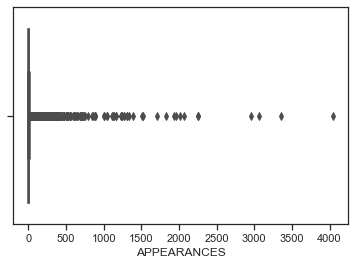

In [71]:
sns.boxplot(x=DB['APPEARANCES'])